In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

file_path = 'fingini.csv'
df = pd.read_csv(file_path)
df.replace('', np.nan, inplace=True)
df_cleaned = df.dropna(subset=['Dwelling population (persons)', 
                               'At risk of poverty rate (threshold 60% of median) (%)', 
                               'At risk of poverty rate of children in dwelling population (%)', 
                               'Gini coefficient (gross income) (%)']).reset_index(drop=True)

# Select numerical columns for analysis
X = df_cleaned[['Dwelling population (persons)', 
                'At risk of poverty rate (threshold 60% of median) (%)', 
                'At risk of poverty rate of children in dwelling population (%)', 
                'Gini coefficient (gross income) (%)']].values

# Categorize regions
def categorize_region(region):
    if region == 'WHOLE COUNTRY':
        return 'Whole Country'
    elif region.startswith('MK'):
        return 'Regions (MK)'
    elif region.startswith('HVA'):
        return 'Wellbeing Services Counties (HVA)'
    elif region.startswith('SK'):
        return 'Subregions (SK)'
    else:
        return 'Municipalities'

df_cleaned['Category'] = df_cleaned['Region'].apply(categorize_region)

# Define marker styles and colors for categories
category_styles = {
    'Whole Country': ('magenta', '*'),         
    'Regions (MK)': ('lime', 'o'),       
    'Wellbeing Services Counties (HVA)': ('purple', '+'),  
    'Subregions (SK)': ('red', 'x'),     
    'Municipalities': ('deepskyblue', '.')
}

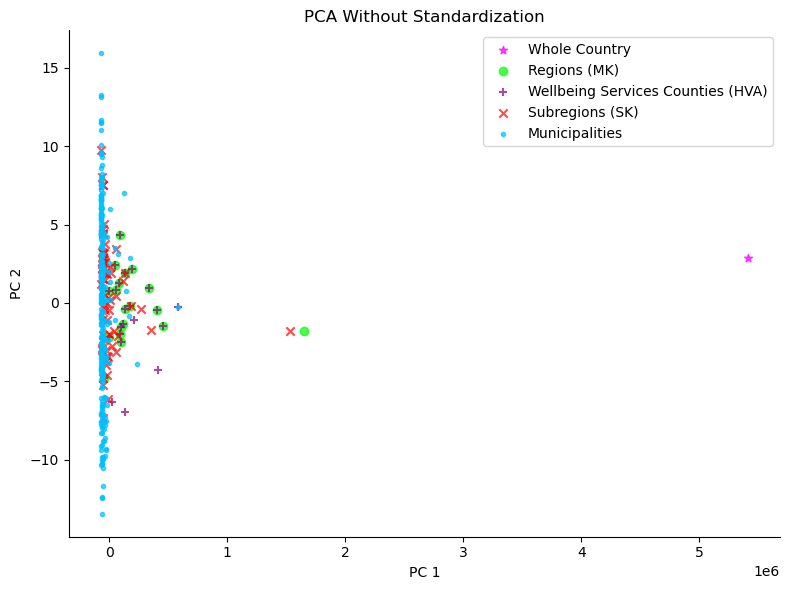

In [2]:
# PCA without standardization
pca_no_std = PCA(n_components=2)
pca_no_std_result = pca_no_std.fit_transform(X)
pca_no_std_df = pd.DataFrame(pca_no_std_result, columns=['PC1', 'PC2'])
pca_no_std_df['Category'] = df_cleaned['Category']

fig1, ax1 = plt.subplots(figsize=(8, 6))
for category, (color, marker) in category_styles.items():
    subset = pca_no_std_df[pca_no_std_df['Category'] == category]
    ax1.scatter(subset['PC1'], subset['PC2'], c=color, marker=marker, label=category, alpha=0.7)
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_title('PCA Without Standardization')
ax1.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
#plt.savefig('pca_non_std.png', bbox_inches='tight', dpi=300)
plt.close()

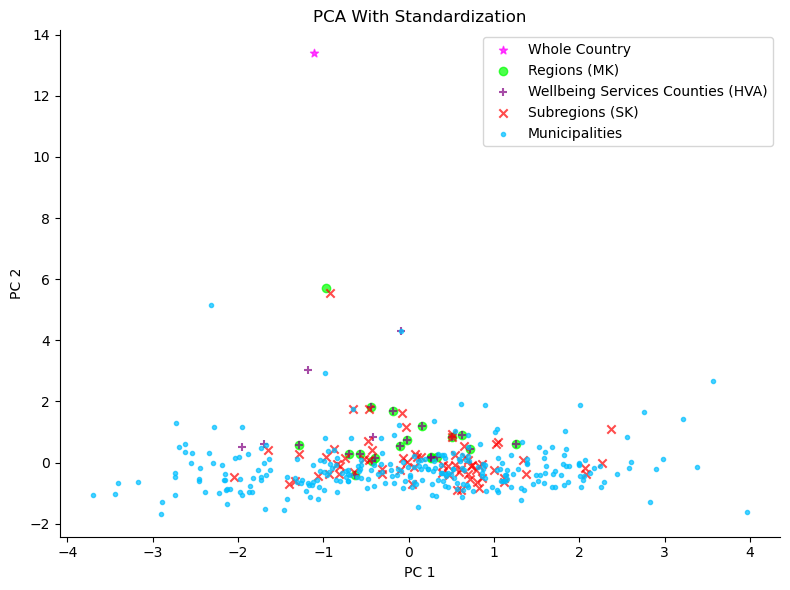

In [93]:
# PCA with standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_std = PCA(n_components=2)
pca_std_result = pca_std.fit_transform(X_scaled)
pca_std_df = pd.DataFrame(pca_std_result, columns=['PC1', 'PC2'])
pca_std_df['Category'] = df_cleaned['Category']

fig2, ax2 = plt.subplots(figsize=(8, 6))
for category, (color, marker) in category_styles.items():
    subset = pca_std_df[pca_std_df['Category'] == category]
    ax2.scatter(subset['PC1'], subset['PC2'], c=color, marker=marker, label=category, alpha=0.7)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_title('PCA With Standardization')
ax2.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
#plt.savefig('pca_std.png', bbox_inches='tight', dpi=300)


/opt/software/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


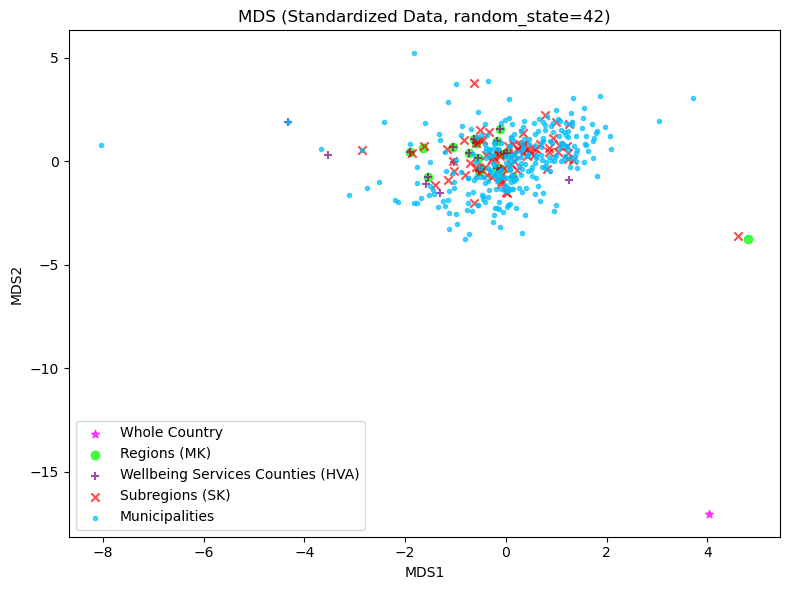

In [78]:
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X_scaled)  # Using scaled data for consistency
mds_df = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'])
mds_df['Category'] = df_cleaned['Category']

fig3, ax3 = plt.subplots(figsize=(8, 6))
for category, (color, marker) in category_styles.items():
    subset = mds_df[mds_df['Category'] == category]
    ax3.scatter(subset['MDS1'], subset['MDS2'], c=color, marker=marker, label=category, alpha=0.7)
ax3.set_xlabel('MDS 1')
ax3.set_ylabel('MDS 2')
ax3.set_title('MDS (Standardized Data, random_state=42)')
ax3.legend()
plt.tight_layout()
plt.show()
#plt.savefig('mds.pdf', bbox_inches='tight', transparent=True)
plt.close()

/opt/software/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


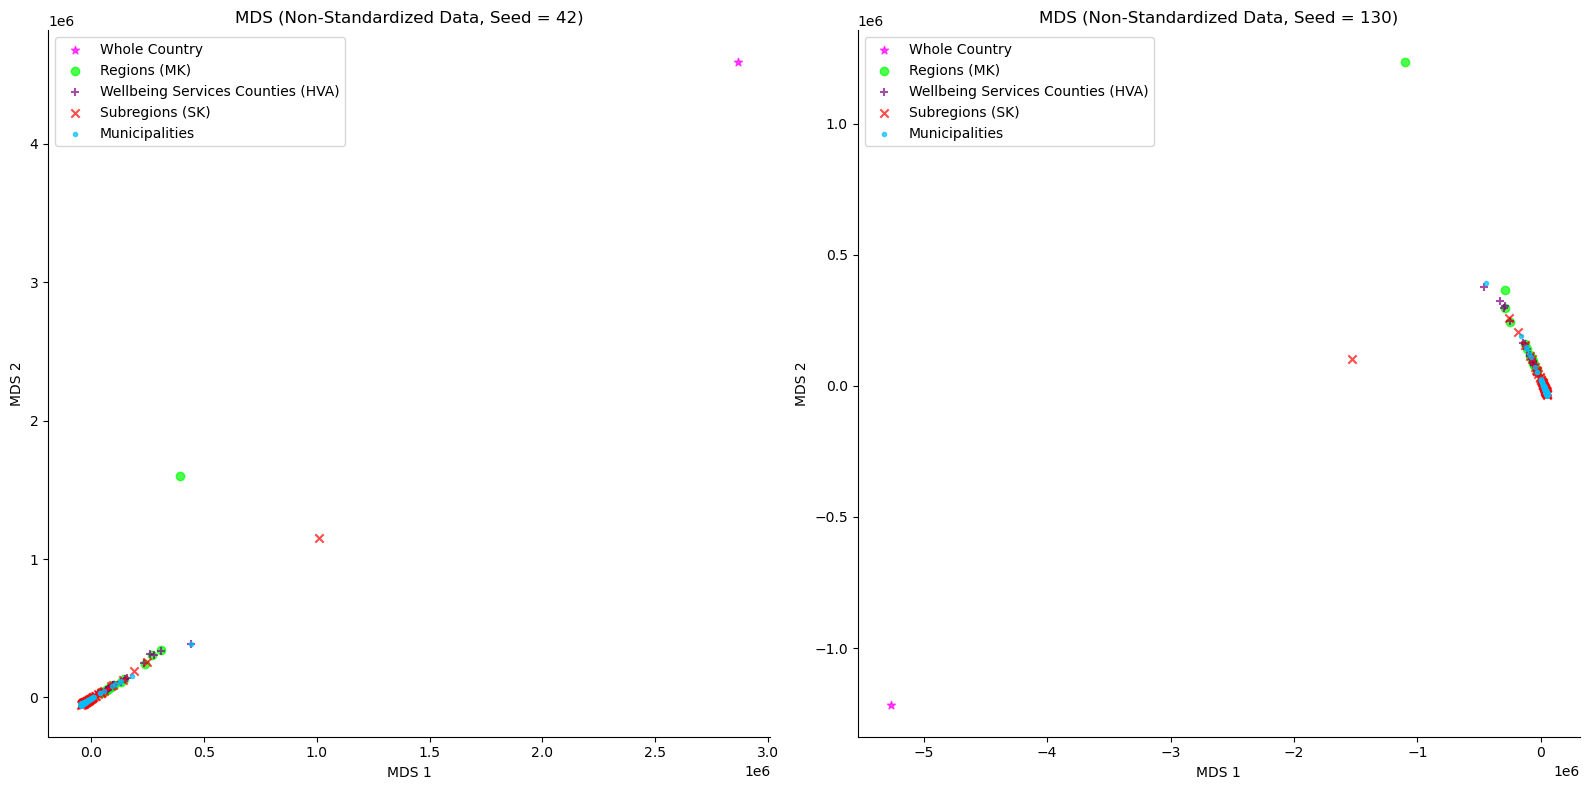

In [3]:
# MDS on the non-standardized data with two different random seeds 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
mds_rs42 = MDS(n_components=2, random_state=42)
mds_rs42_result = mds_rs42.fit_transform(X)
mds_rs42_df = pd.DataFrame(mds_rs42_result, columns=['MDS1', 'MDS2'])
mds_rs42_df['Category'] = df_cleaned['Category']


for category, (color, marker) in category_styles.items():
    subset = mds_rs42_df[mds_rs42_df['Category'] == category]
    ax1.scatter(subset['MDS1'], subset['MDS2'], c=color, marker=marker, label=category, alpha=0.7)
ax1.set_xlabel('MDS 1')
ax1.set_ylabel('MDS 2')
ax1.set_title('MDS (Non-Standardized Data, Seed = 42)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend()

# 2. MDS with random_state=123 (non-standardized data)
mds_rs123 = MDS(n_components=2, random_state=130)
mds_rs123_result = mds_rs123.fit_transform(X)
mds_rs123_df = pd.DataFrame(mds_rs123_result, columns=['MDS1', 'MDS2'])
mds_rs123_df['Category'] = df_cleaned['Category']


for category, (color, marker) in category_styles.items():
    subset = mds_rs123_df[mds_rs123_df['Category'] == category]
    ax2.scatter(subset['MDS1'], subset['MDS2'], c=color, marker=marker, label=category, alpha=0.7)
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')
ax2.set_title('MDS (Non-Standardized Data, Seed = 130)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

plt.tight_layout()
plt.show()
# plt.savefig('mds_non_std_comparison.png', bbox_inches='tight', dpi=300)
plt.close()

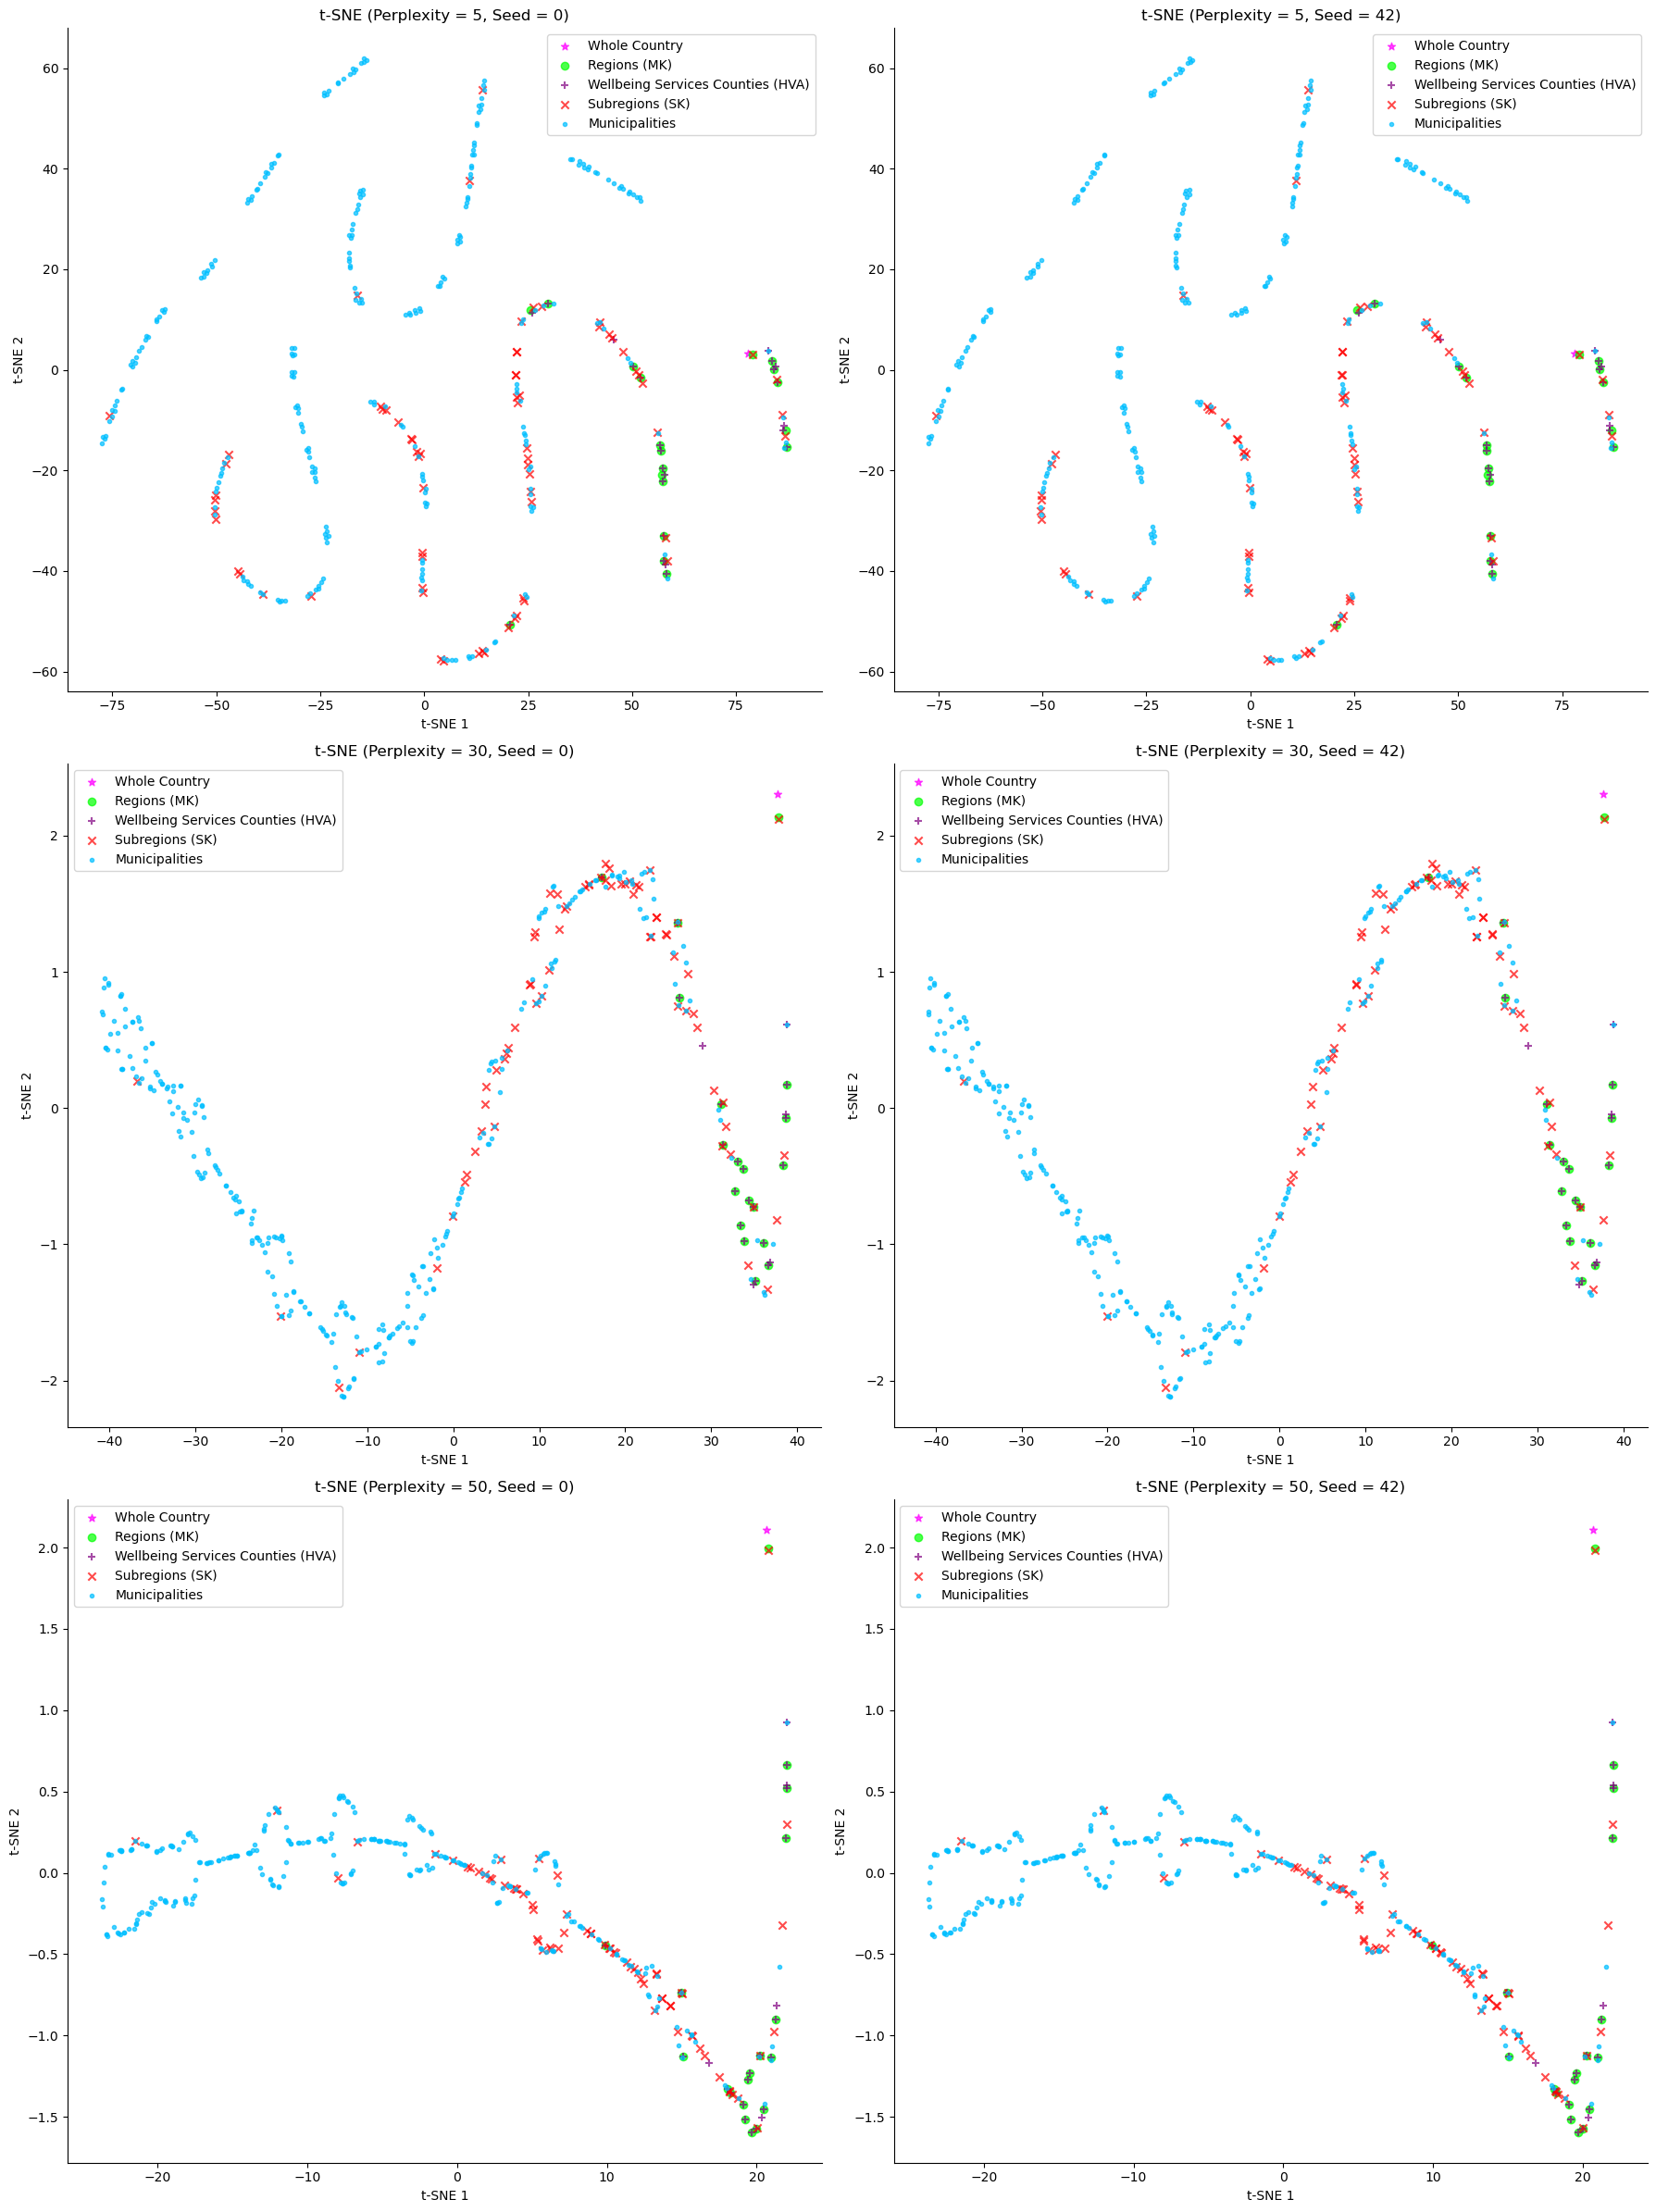

In [4]:
# t-SNE on the non-standardized data with two different random seeds for each of three different values of the
# “perplexity” parameter 
# Define perplexity values and random seeds
perplexities = [5, 30, 50]
random_seeds = [0, 42]

# Create a 3x2 subplot matrix
fig, axes = plt.subplots(3, 2, figsize=(18, 24))  # 3 rows, 2 columns

# Loop over perplexities (rows) and random seeds (columns)
for i, perplexity in enumerate(perplexities):
    for j, seed in enumerate(random_seeds):
        # Perform t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=seed, init='pca')
        tsne_result = tsne.fit_transform(X)
        tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
        tsne_df['Category'] = df_cleaned['Category']

        # Plot on the corresponding subplot
        ax = axes[i, j]
        for category, (color, marker) in category_styles.items():
            subset = tsne_df[tsne_df['Category'] == category]
            ax.scatter(subset['t-SNE1'], subset['t-SNE2'], c=color, marker=marker, label=category, alpha=0.7)
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.set_title(f't-SNE (Perplexity = {perplexity}, Seed = {seed})')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()

# Adjust layout and save as PNG
plt.tight_layout()
plt.show()
#plt.savefig('tsne_non_std_comparison.png', bbox_inches='tight', dpi=300)
plt.close()